Daily trend for each day

In [1]:
from pathlib import Path
import json
import matplotlib.pyplot as plt
import os
from datetime import datetime
import matplotlib.dates as mdates

In [2]:
DATA_DIR = Path("./data")
TEST_DATE = "Fri_Apr_2_2021"
TEST_ID = 103072132
TEST_ID2 = 103000423
TEST_ID3 = 108002604

In [9]:
def load_json(filepath):
    with open(filepath) as f:
        return json.load(f)

def get_speedband(filepath, link_id):
    jjson = load_json(filepath)
    for link in jjson:
        if link["LinkID"] == str(link_id):
            return link["SpeedBand"]

def filename_to_time(filename):
    time_string = filename.split(".")[0]
    date_time = datetime.strptime(time_string, "%H:%M:%S")
    return date_time
        
def get_speedbands(dirpath, link_id):
    file_list = os.listdir(dirpath)
    file_list.sort()
    time_list = []
    speedband_list = []
    for file in file_list:
        time = filename_to_time(file)
        time_list.append(time)
        speedband = get_speedband(dirpath/file, link_id)
        speedband_list.append(speedband)
    return time_list, speedband_list

def plot_speedbands(dirpath, link_id):
    times, speedbands = get_speedbands(dirpath, link_id)
    plt.plot(times, speedbands)
    ax = plt.gca()
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
    
def plot_all_speedbands(datadir, day, link_id):
    datelist = os.listdir(datadir)
    datelist = [date for date in datelist if date.startswith(day)]
    for date in datelist:
        plot_speedbands(datadir/date, link_id)

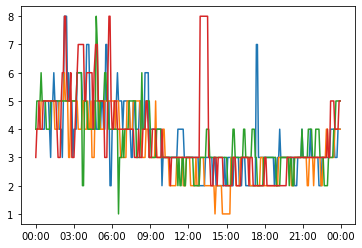

In [10]:
plot_all_speedbands(DATA_DIR, "Fri", TEST_ID2)